# Biodiversity In National Parks

## Prompt

For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose wuestions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

## Analysis Questions
* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?



In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
print("species shape: {}".format(species.shape))
print("observations shape: {}".format(observations.shape))

species shape: (5824, 4)
observations shape: (23296, 3)


## Exploring the Data

In [6]:
print("number of species: {}".format(species.scientific_name.nunique()))

number of species: 5541


In [7]:
print("number of categories: {}".format(species.category.nunique()))
print("categories: {}".format(species.category.unique()))

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [9]:
print("number of conservation statuses: {}".format(species.conservation_status.nunique()))
print("conservation statuses: {}".format(species.conservation_status.unique()))

number of conservation statuses: 4
conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [10]:
print("nan values: {}".format(species.conservation_status.isna().sum()))

species.groupby('conservation_status').size()

nan values: 5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [11]:
print("number of parks: {}".format(observations.park_name.nunique()))
print("park names: {}".format(observations.park_name.unique()))

number of parks: 4
park names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [12]:
print("number of observations: {}".format(observations.observations.sum()))

number of observations: 3314739


## Analysis

In [13]:
species.fillna("No Intervention", inplace = True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [14]:
need_conservation = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()\
    .unstack()
need_conservation

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<Axes: xlabel='conservation_status'>

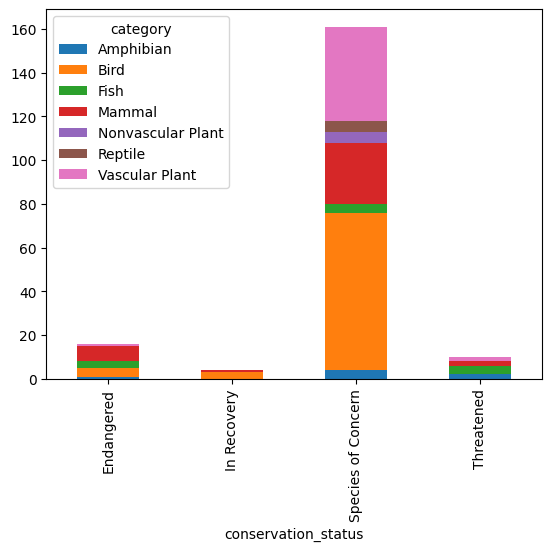

In [15]:
need_conservation.plot(kind = 'bar', stacked=True)

In [16]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [23]:
category_counted = species.groupby(['category', 'is_protected']).scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected', index= 'category', values = 'scientific_name')\
                        .reset_index()

category_counted.columns = ['category', 'not_protected', 'protected']

category_counted

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [25]:
category_counted['protected_percent'] = category_counted.protected / (category_counted.protected + category_counted.not_protected) * 100

category_counted

,category,not_protected,protected,protected_percent
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [28]:
from scipy.stats import chi2_contingency

# Col [protected, not_protected]
# Rows [Mammal, Bird]

contingency1 = [[30, 146],
                [75, 413]]

chi2_contingency(contingency1)

# Since there is a pval of 0.68, there is no significant relationship between mammals and birds

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [29]:
# Rows [Mammal, Reptile]

contingency2 = [[30,146],
                [5, 73]]

chi2_contingency(contingency2)

# pval of 0.039 suggests the difference in protection of mammals and reptiles is statistically significant. 
# This shows that mammals have a significantly higher rate of protection than reptiles

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

In [32]:
common_names_sep = []

for name in species.common_names:
    temp_list = name.split()
    for i in temp_list:
        common_names_sep.append(i)

print(common_names_sep)

word_count = {}

for word in common_names_sep:
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] += 1

print(word_count)




["Gapper's", 'Red-Backed', 'Vole', 'American', 'Bison,', 'Bison', 'Aurochs,', 'Aurochs,', 'Domestic', 'Cattle', '(Feral),', 'Domesticated', 'Cattle', 'Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep,', 'Sheep', '(Feral)', 'Wapiti', 'Or', 'Elk', 'White-Tailed', 'Deer', 'Feral', 'Hog,', 'Wild', 'Pig', 'Coyote', 'Gray', 'Wolf', 'Red', 'Wolf', 'Common', 'Gray', 'Fox,', 'Gray', 'Fox', 'Black', 'Fox,', 'Cross', 'Fox,', 'Red', 'Fox,', 'Silver', 'Fox', 'Red', 'Fox', 'Mountain', 'Lion', 'Wild', 'Cat,', 'Wildcat', 'Bobcat', 'Panther', '(Mountain', 'Lion)', 'Striped', 'Skunk', 'Eastern', 'Spotted', 'Skunk', 'River', 'Otter', 'Northern', 'River', 'Otter', 'Fisher', 'Mink', '(Or', 'Weasel)', 'Long-Tailed', 'Weasel', 'Least', 'Weasel', 'Mink', 'Common', 'Raccoon,', 'Raccoon', 'Black', 'Bear', "Rafinesque's", 'Big-Eared', 'Bat', 'Big', 'Brown', 'Bat', 'Silver-Haired', 'Bat', 'Eastern', 'Red', 'Bat,', 'Red', 'Bat', 'Hoary', 'Bat', 'Mississippi', 'Myotis,', 'Southeastern', 'Myotis', 'Gray', 'Myotis', "K

AttributeError: 'dict' object has no attribute 'max'

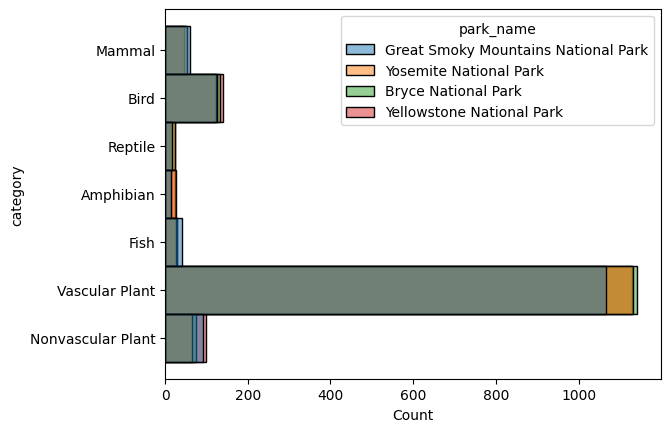

<Figure size 640x480 with 0 Axes>

In [18]:
endangered = species[species['conservation_status'] == 'Endangered']
sns.histplot(y='category', data=species, hue = observations.park_name)
plt.show()
plt.clf()

In [19]:
observations_max = observations.groupby('park_name').max().reset_index()
print(observations_max)

                             park_name                      scientific_name   
0                  Bryce National Park  Zygodon viridissimus var. rupestris  \
1  Great Smoky Mountains National Park  Zygodon viridissimus var. rupestris   
2            Yellowstone National Park  Zygodon viridissimus var. rupestris   
3               Yosemite National Park  Zygodon viridissimus var. rupestris   

   observations  
0           176  
1           147  
2           321  
3           223  
